# Initial Data Exploration

Initial data exploration for the project '**Aftershock pattern prediction based on earthquake rupture data for improved seismic hazard assessment**'. DeVries18 will refer to the article 'Deep learning of aftershock patterns following large earthquakes' by Phoebe M. R. DeVries, Fernanda Viégas, Martin Wattenberg & Brendan J. Meade, and published in Nature in 2018 (https://www.nature.com/articles/s41586-018-0438-y ).

## Data source

### Finite-Source Rupture Model Database

Import the original mainshock rupture SRCMOD data files from the [project's GitHub](https://github.com/amignan/pred_seism_aftXYZ) repository.  
We first retrieved the same 199 SRCMOD.fsp files as used in DeVries18 from [here](http://equake-rc.info/SRCMOD/searchmodels/allevents/)

In [1]:
SRCMOD_dir = './datasets/SRCMOD/'

In [2]:
import os
import fnmatch

file_list = fnmatch.filter(os.listdir(SRCMOD_dir), '*.fsp')
file_list.sort()
len(file_list)

199

Check the format of one of the SCRMOD files (should be the same as described [here](http://equake-rc.info/SRCMOD/fileformats/fsp/ ) ).

In [3]:
with open(SRCMOD_dir + file_list[0]) as file0:
    line = file0.readline()
    while line:
        print(line.strip())
        line = file0.readline()

% ----------------------------------  FINITE-SOURCE RUPTURE MODEL  --------------------------------
%
% Event : Hyuga-nada (Japan) 		04/01/1968 		[Yagi et al. (1998) ]
% EventTAG: s1968HYUGAx01YAGI
%
% Loc  : LAT  = 32.28 		LON = 132.53		DEP = 15.0
% Size : LEN  = 72.0 km 	WID =  63.0 km		Mw = 7.53	Mo = 2.22e+20 Nm
% Mech : STRK = 227.0		DIP = 12.0		RAKE = 90.0	Htop = 10.32 km
% Rupt : HypX = 31.50 km 	HypZ = 22.50 km 		avTr = 12.0 s	avVr = 2.8 km/s
%
% ----------------------------------  inversion-related parameters  --------------------------------
%
% Invs :  Nx  =  8 	Nz  = 7 	Fmin = 999.00 Hz 	Fmax = 999.00 Hz
% Invs :  Dx  =  9.00 km 	Dz  = 9.00 km
% Invs :  Ntw =  1	Nsg =  1 			(# of time-windows,# of fault segments)
% Invs :  LEN =  999.0 s	SHF =  0.0 s 		(time-window length and time-shift)
% SVF  :  unknown 					(type of slip-velocity function used)
%
% Data : 	SGM	TELE	TRIL	LEVEL	GPS	INSAR	SURF	OTHER
% Data : 	999	0	0	0	0	0	0	0
% PHImx: 	999	0	0	0	0	0	0	0
% Rmin : 	999	0	0	0	

### DeVries18 Deep Learning Model Input

Import the DeVries18 model inputs via the 'complete_dataset_labelled.pkl' pickle file.

We first downloaded all labelled samples per mainshock rupture model, in csv format, from the [DeVries18 Google Drive](https://drive.google.com/drive/folders/1c5Rb_6EsuP2XedDjg37bFDyf8AadtGDa).

We then pickled the concatenated data frame where the column ID was added, with ID = SRCMOD EventTAG; see the 00-mk_pickle.ipynb.

In [4]:
import pandas as pd

df_complete = pd.read_pickle('./Data/complete_dataset_labelled.pkl')
len(df_complete)

6121210

In [5]:
df_complete.columns

Index(['x', 'y', 'z', 'stresses_full_xx', 'stresses_full_xy',
       'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz',
       'stresses_full_zz', 'stresses_full_max_shear', 'stresses_full_cfs_1',
       'stresses_full_cfs_2', 'stresses_full_cfs_3', 'stresses_full_cfs_4',
       'von_mises', 'aftershocksyn', 'ID'],
      dtype='object')

In [6]:
df_complete.sample(10)

,x,y,z,stresses_full_xx,stresses_full_xy,stresses_full_yy,stresses_full_xz,stresses_full_yz,stresses_full_zz,stresses_full_max_shear,stresses_full_cfs_1,stresses_full_cfs_2,stresses_full_cfs_3,stresses_full_cfs_4,von_mises,aftershocksyn,ID
4262,675100.393778,4.323047e+06,-7500.0,-1974.772315,-1624.945286,-2968.622404,568.066864,565.688878,-82.869004,2200.569649,233.111832,-750.434894,750.434894,-233.111832,4036.924270,0.0,s2005HONSHU01SHAO
39512,868742.551129,-9.317356e+05,-32500.0,-4974.107923,-9569.956658,4780.439122,-78190.491361,-245145.553451,33867.644563,258146.084107,223795.480417,-267956.757703,267956.757703,-223795.480417,447358.902205,0.0,s2006SOUTHE01KONC
14436,250313.272806,4.489840e+06,-47500.0,-2996.986964,2207.891120,1535.219643,-1663.380835,1357.698505,-689.707290,3745.668265,2360.822001,-807.388506,807.388506,-2360.822001,6622.858954,0.0,s1999DUZCET01BIRG
5345,590539.117050,4.147847e+06,-12500.0,-10375.903566,35196.154043,8584.528505,-2914.061361,3502.393728,-3874.814723,36753.541451,4170.150341,-22693.286585,22693.286585,-4170.150341,63695.227542,0.0,s2003BOUMER01SEMM
24678,645412.561566,1.705280e+06,-37500.0,-46.161404,-1662.978400,-426.755521,389.872753,-2114.289248,-1710.812823,2845.106210,700.138932,-2637.125889,2637.125889,-700.138932,4944.240137,0.0,s2012OAXACA01HAYE
12605,437629.819935,3.938298e+06,-7500.0,-3839.063981,62440.834264,28239.227353,33961.251922,2530.309931,2690.451893,73076.315724,30382.333725,-41955.668423,41955.668423,-30382.333725,126641.526728,0.0,s2011TOHOKU01SATA
6748,687697.998320,1.813042e+05,-12500.0,335957.497598,45961.393444,-115499.468513,-34304.163122,-9575.532960,2391.297041,232316.130241,157980.747418,-190882.933300,190882.933300,-157980.747418,417889.657544,0.0,s2012SUMATR02HAYE
39144,809711.944414,4.569548e+06,-47500.0,7647.262583,9181.236872,3604.257282,384.157009,-836.128538,-4144.295427,9951.071156,-4374.561311,1728.306485,-1728.306485,4374.561311,19056.200953,0.0,s1994SANRIK01NAKA
7118,499035.216656,5.046223e+06,-12500.0,38361.494527,-40813.564324,14174.526103,718.271460,-5171.507856,-869.860034,43091.780063,49361.006340,-7490.506318,7490.506318,-49361.006340,79083.774624,0.0,s2007KURILI01SLAD
4165,744477.815480,3.517042e+06,-12500.0,-47273.031276,-6516.706848,-21730.539023,24342.240203,-14010.453936,29421.281663,47395.030296,44145.189115,-31983.356539,31983.356539,-44145.189115,84079.649683,0.0,s1996HYUGAx01YAGI


Visualize one labelled sample - let us consider the 1992 Landers case for one specific rupture model (event tag '1992LANDER01COHE'). 

We here want to reproduce an animation similar to the one shown in the [this](https://www.blog.google/technology/ai/forecasting-earthquake-aftershock-locations-ai-assisted-science/.) Google blog post to check the aftershock 3D pattern.

In [7]:
eventTag = 's1992LANDER01COHE'

loc_aft_allmainshocks = df_complete[['x', 'y', 'z', 'aftershocksyn', 'ID']]
loc_aft_eventTag = loc_aft_allmainshocks.loc[(loc_aft_allmainshocks['ID'] == eventTag) 
                                             & (loc_aft_allmainshocks['aftershocksyn'] == 1)]

/home/fenris/.condahome/envs/Uni/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if sys.path[0] == "":


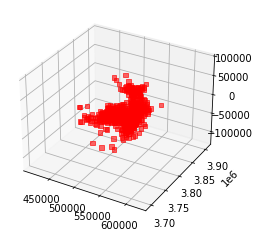

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

x = loc_aft_eventTag['x']
y = loc_aft_eventTag['y']
z = loc_aft_eventTag['z']

fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
ax.auto_scale_xyz([min(x), max(x)], [min(y), max(y)], [min(z), max(z)])

max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

def init():
    ax.scatter(x, y, z, marker='s', s=20, c="red", alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=45, blit=True)

In [ ]:
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())